In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\ACER\Downloads\archive (8)\Titanic-Dataset.csv")

In [4]:
# Preview data
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

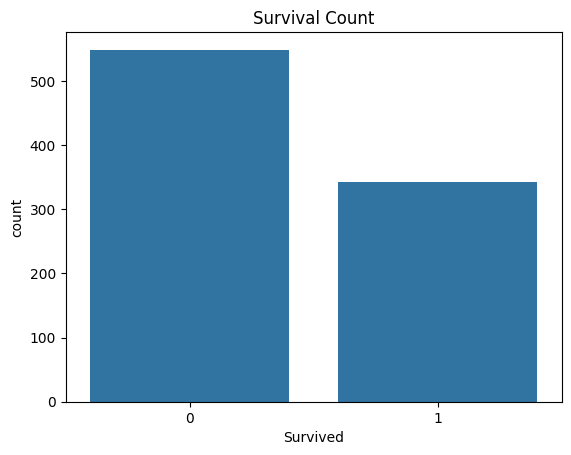

In [8]:
# Exploratory Data Analysis
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

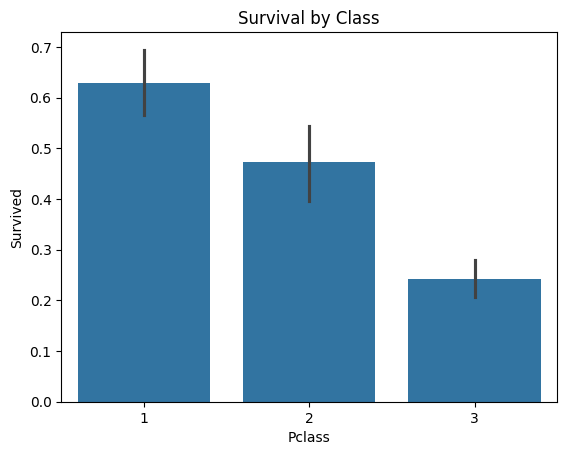

In [9]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival by Class')
plt.show()

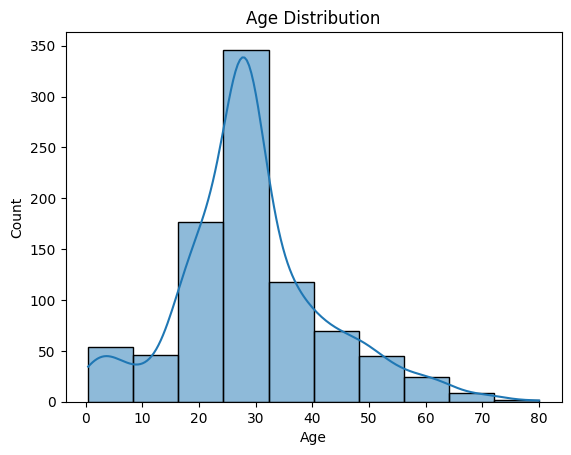

In [17]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

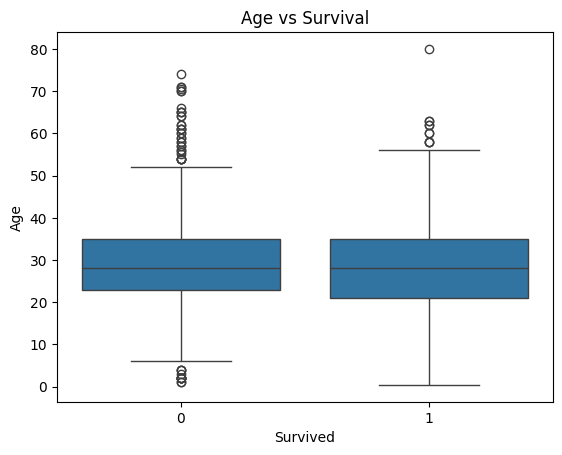

In [11]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()


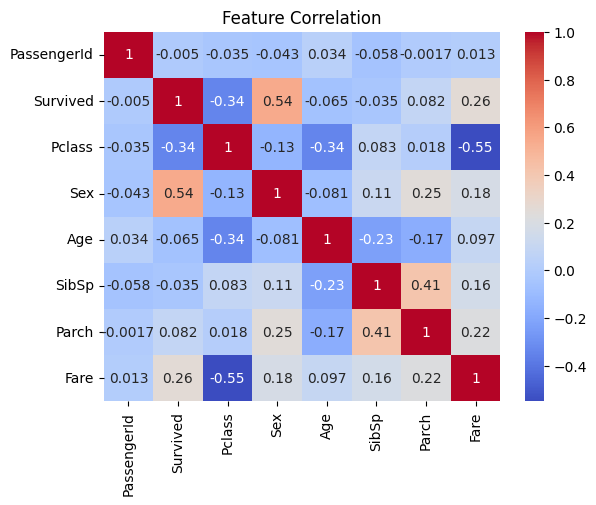

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

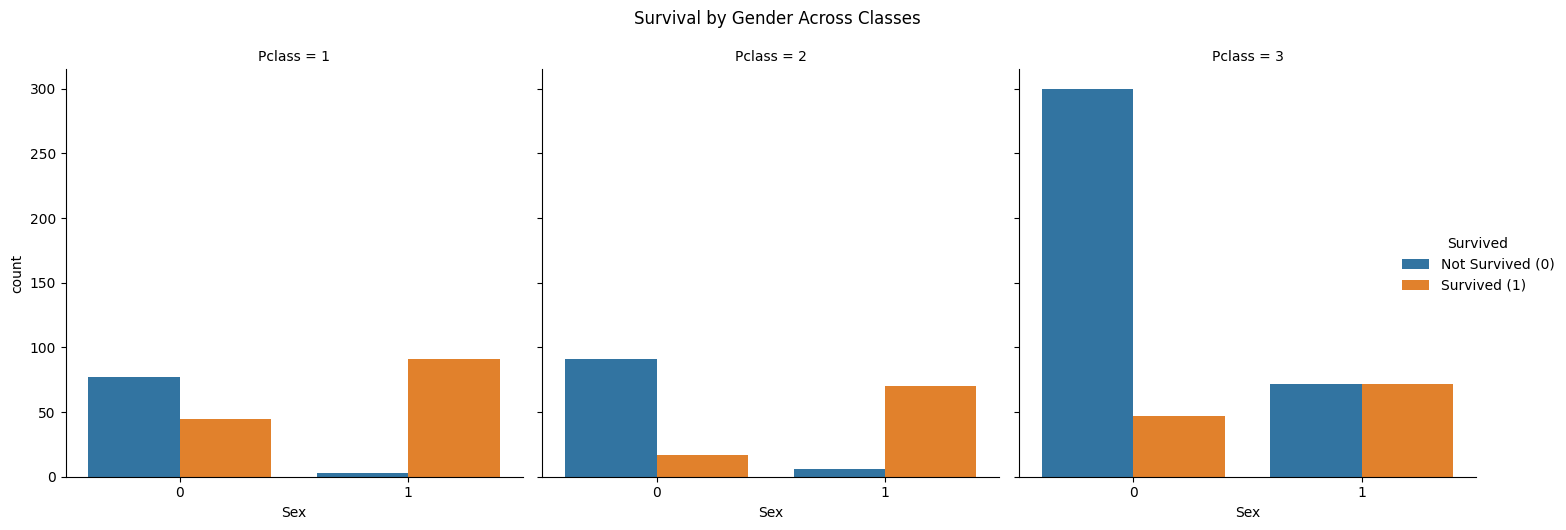

In [16]:
# Plot
g = sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=df)

# Customize legend
new_labels = ['Not Survived (0)', 'Survived (1)']
for t, label in zip(g._legend.texts, new_labels):
    t.set_text(label)

# Add title
plt.suptitle('Survival by Gender Across Classes', y=1.05)
plt.show()

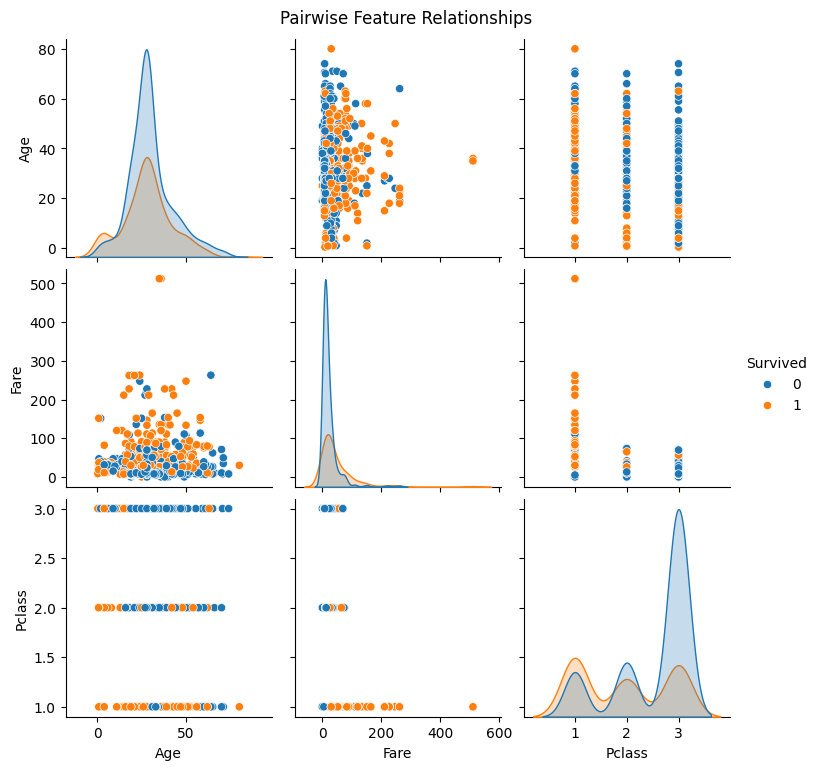

In [18]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()